# 4. Exploration

**The main goal of my exploration is to find out whether the players got better as the tournament progressed. Did players play better in the final than in the first rounds?**

## 4.1 Average points per dart

**Let's start simple and see how the points have evolved over the days of the tournament. Did the throws get better as the final (day 16) approached?**\

**To Check this, I created a graph with a rolling average of all throws. I chose 3000 as window, because a lower number created noise on the graph and with a higher number, information would be lost.**

<AxesSubplot:xlabel='day'>

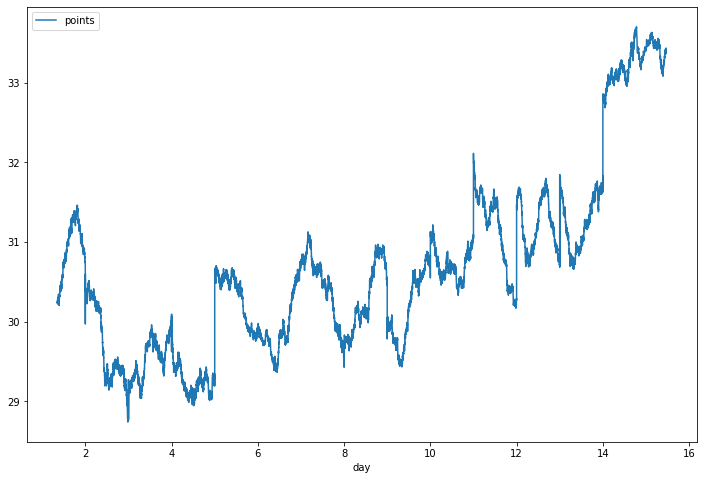

In [166]:
#average points per dart
throws.rolling(window=3000).mean().plot(y="points", x="day",figsize=(12,8))

## 4.2. Throws per day

**Let's calculate how many darts have been thrown each day, for this I used a groupby and aggregated for the count.**

In [168]:
grouped_throws_by_day = throws.groupby("day")
throws_by_day = grouped_throws_by_day.count()
throws_by_day = throws_by_day.reset_index()
throws_by_day

,day,type,points,segment,event_points,double_attempt,team
0,1,1944,1944,1944,1944,1944,1944
1,2,3780,3780,3780,3780,3780,3780
2,3,4348,4348,4348,4348,4348,4348
3,4,3449,3449,3449,3449,3449,3449
4,5,4433,4433,4433,4433,4433,4433
5,6,1897,1897,1897,1897,1897,1897
6,7,2994,2994,2994,2994,2994,2994
7,8,4059,4059,4059,4059,4059,4059
8,9,4361,4361,4361,4361,4361,4361
9,10,3845,3845,3845,3845,3845,3845


**Now every column contains the amount of rows for that day, so we can use every column to plot this on a bar graph. Let's go for the 'type' column.**

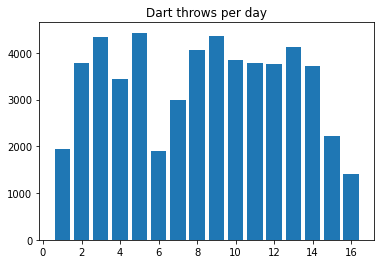

In [185]:
#throws per day
plot = plt.bar(throws_by_day['day'], throws_by_day['type']);
plt.title('Dart throws per day')
plt.show()

**Okay, cool. Now let's take this a step further**

## 4.3. Throws per match

**In the previous chart, we saw that on the last day the least darts are thrown. This is not because players were better that day so they had to throw less darts, this is just because only 1 match had been played that day. So let's try to graph the amount of darts thrown per match**

**To do this, we have to find a way to calculate how many matches have been played each day. But how do we do this? We don't have any information about match numbers. But we do have other information: \
We know that a game ends when a certain amount of sets has been played, and thus a new game starts when the set_scores are reset to zero. So we can try to find rows where the set_scores feature change from any number to zero, indicating a new game has started.**

**To do this I checked for the following condition: if a set_score is > 0 and the set score of the next row is 0, it indicates a new game has started. This could happen for both set_score_home as set_score_away, so I used 'or' to check for both conditions.**

In [91]:
matches = score_changes[((score_changes['set_score_home'] > 0)  & (score_changes['set_score_home'].shift(-1) == 0)) | ((score_changes['set_score_away'] > 0)  & (score_changes['set_score_away'].shift(-1) == 0))]

**Now we just have to group the results by day, just like we did previously.**

In [81]:
grouped_matches_by_day = matches.groupby("day")
matches_by_day = grouped_matches_by_day.count()
matches_by_day = matches_by_day.reset_index()
matches_by_day

,day,type,points,segment,event_points,double_attempt,team,leg_points_home,leg_pints_away,leg_score_home,leg_score_away,set_score_home,set_score_away
0,1,4,0,0,0,0,4,4,4,4,4,4,4
1,2,8,0,0,0,0,8,8,8,8,8,8,8
2,3,8,0,0,0,0,8,8,8,8,8,8,8
3,4,8,0,0,0,0,8,8,8,8,8,8,8
4,5,8,0,0,0,0,8,8,8,8,8,8,8
5,6,4,0,0,0,0,4,4,4,4,4,4,4
6,7,8,0,0,0,0,8,8,8,8,8,8,8
7,8,8,0,0,0,0,8,8,8,8,8,8,8
8,9,8,0,0,0,0,8,8,8,8,8,8,8
9,10,5,0,0,0,0,5,5,5,5,5,5,5


**Great. I checked this with the match information only and this is right. Except for the last column. For some reason the set_score was not reset to zero after the final match. On this day only 1 match had been played, so I manually added this row.**

In [175]:
matches_by_day.append({'day': 15, 'type': 1},  ignore_index=True);

**Now we can plot the amount of matches together with the amount of darts thrown per match, to have an idea if less darts were needed to finish matches in the last days of the tournament.**

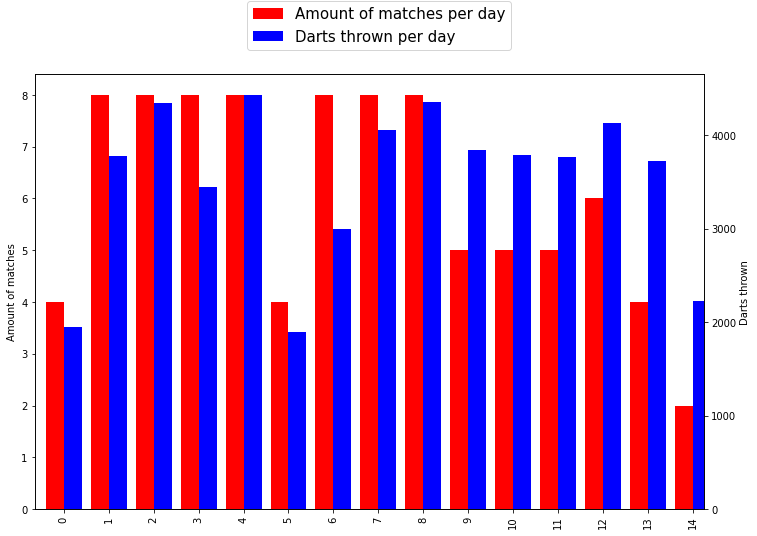

In [204]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

throws_by_day.type.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
matches_by_day.type.plot(kind='bar', color='red', ax=ax, width=width, position=1)

ax.set_ylabel('Amount of matches')
ax2.set_ylabel('Darts thrown')

fig.legend(labels= ["Amount of matches per day", "Darts thrown per day"],
           loc="upper center",        # Position of the legend
           borderaxespad=0.1,
           prop={'size': 15}) 


plt.show()

**Strange. On the last days much more darts where thrown per match in comparison with the first days. Did the players play then? In 4.1 we already found out that this could not be the case.**

**The problem here is that a match doesn't always contain the same amount of sets. Matches at the beginning of the tournament for example only contained 3 sets, while the finale contained 7. We have to compare with sets instead of matches.**

## 4.4 Throws per set

**We can do the same thing as we did before, but then for sets.**

In [205]:
sets = score_changes[((score_changes['leg_score_home'] > 0)  & (score_changes['leg_score_home'].shift(-1) == 0)) | ((score_changes['leg_score_away'] > 0)  & (score_changes['leg_score_away'].shift(-1) == 0))]

In [206]:
grouped_sets_by_day = sets.groupby("day")
sets_by_day = grouped_sets_by_day.count()
sets_by_day = sets_by_day.reset_index()

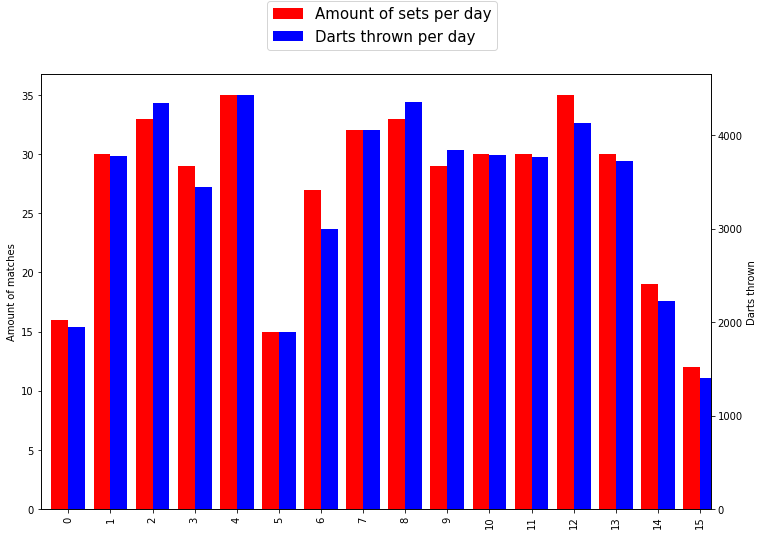

In [207]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

throws_by_day.type.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
sets_by_day.type.plot(kind='bar', color='red', ax=ax, width=width, position=1)

ax.set_ylabel('Amount of matches')
ax2.set_ylabel('Darts thrown')

fig.legend(labels= ["Amount of sets per day", "Darts thrown per day"],
           loc="upper center",        # Position of the legend
           borderaxespad=0.1,
           prop={'size': 15}) 

plt.show()

**Fantastic, this looks way better already. Now we can calculate the amount of throws per set grouped by day, by dividing the throws_by_day column by the sets_by_day column**

In [108]:
throws_per_set = throws_by_day['type']/sets_by_day['type']
throws_per_set

0     121.500000
1     126.000000
2     131.757576
3     118.931034
4     126.657143
5     126.466667
6     110.888889
7     126.843750
8     132.151515
9     132.586207
10    126.200000
11    125.766667
12    118.057143
13    124.000000
14    117.473684
15    116.750000
Name: type, dtype: float64

**Graphing this yields:**

<AxesSubplot:>

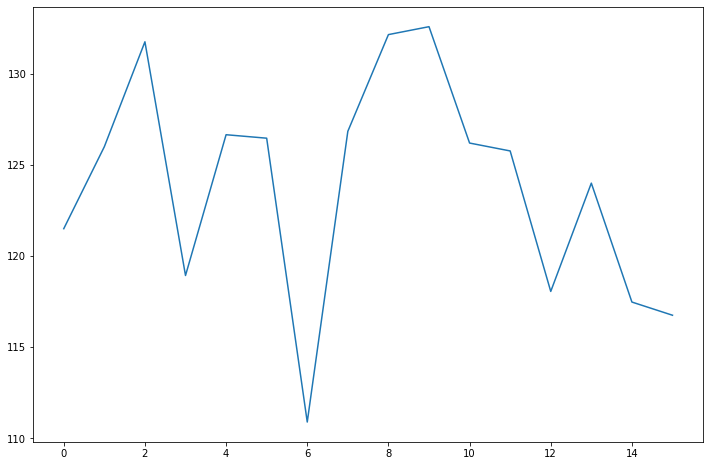

In [109]:
throws_per_set.plot(y="type", x="day",figsize=(12,8))

**Cool, now we can see that the amount of throws per set mostly went down by day, as expected. Except on day 6, apparently great sets were played that day. Now let's do some simpler stuff again.**

## 4.5. Average throw per day

**Let's get the throw average per day by diving the sum of points per day by the amount of throws by day**

<AxesSubplot:xlabel='day'>

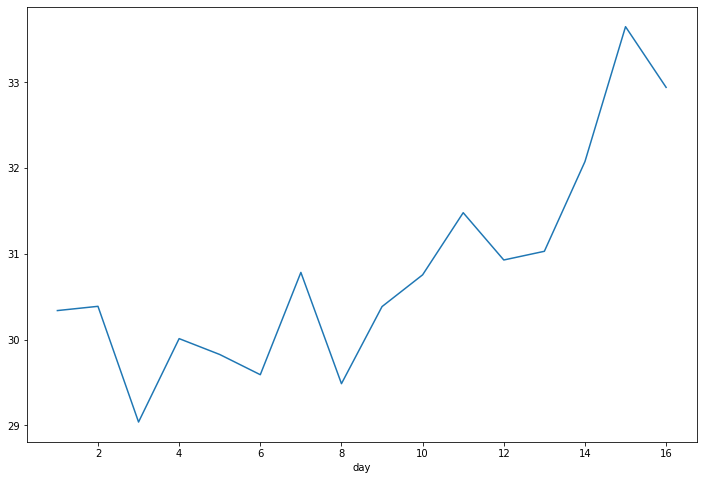

In [6]:
throw_average_by_day = throws_by_day[('points',   'sum')] / throws_by_day[('points',   'count')]
throw_average_by_day.plot(y="points", x="day",figsize=(12,8))

**Now let's check how many triple 20's (the highest score with one dart) have been throws over the days of the tournament. We can do this checking how many times '60' has been thrown and by aggregating over rows counts per day.**

In [7]:
throws_60 = throws[throws['points'] == 60]


In [8]:
throws_60_by_day = throws_60.groupby('day').agg({"points": "count"})
throws_60_by_day

,points
day,
1,476
2,910
3,958
4,856
5,1078
6,423
7,734
8,929
9,1072


**The ratio of triple 20 throws:**

In [9]:
triple_20_ratio = throws_60_by_day['points'] / throws_by_day[('points',   'count')] * 100
triple_20_ratio

day
1     24.485597
2     24.074074
3     22.033119
4     24.818788
5     24.317618
6     22.298366
7     24.515698
8     22.887411
9     24.581518
10    23.563069
11    25.092446
12    25.443944
13    24.636980
14    26.397849
15    31.048387
16    28.051392
dtype: float64

**Plotting this ratio:**

<AxesSubplot:xlabel='day'>

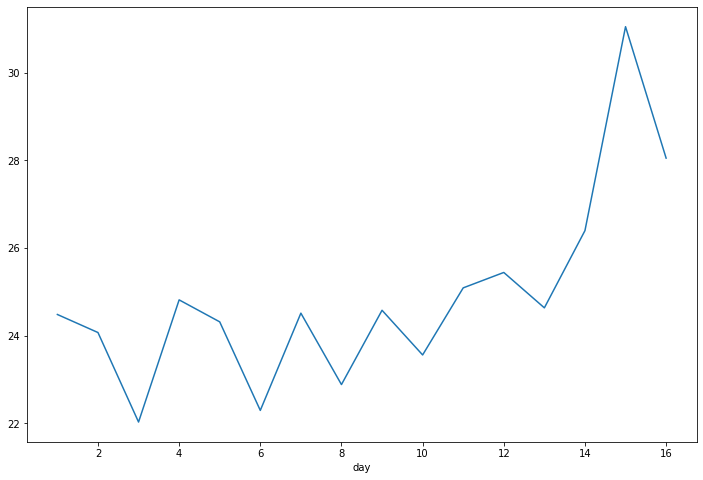

In [10]:
triple_20_ratio.plot(y="points", x="day",figsize=(12,8))

## 4.6. Conclusion

**Although some inconsistencies exist and some days were better than other days, in general we can conclude that the quality of games went up from the first round until the final.**